# 安装环境


In [4]:
!python -m pip install paddlepaddle-gpu==0.0.0.post101 -f https://www.paddlepaddle.org.cn/whl/linux/gpu/develop.html
# %cd ~/work/
# !unzip PaddleSeg-release-2.5.zip
# !mv PaddleSeg-release-2.5 PaddleSeg
%cd ~/work/PaddleSeg/
!pip install -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://www.paddlepaddle.org.cn/whl/linux/gpu/develop.html
/home/aistudio/work/PaddleSeg
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


# 准备数据

In [8]:
# 解压数据
# %cd ~/data/data112904/
# !unzip steel.zip
# 数据太大，aistudio经常挂掉，改用示例数据
%cd ~/data/
!tar xf defect_data.tar
!mkdir -p ~/work/PaddleSeg/data
!ln -s ~/data/defect_data ~/work/PaddleSeg/data
!ls ~/work/PaddleSeg/data

/home/aistudio/data
defect_data


# 训练
缺陷检测

In [10]:
%cd ~/work/PaddleSeg/
!python train.py \
       --config configs/defect_seg/pp_liteseg_stdc2_defect_512x512.yml \
       --do_eval \
       --num_workers 3 \
       --save_interval 1000 \
       --save_dir output/pp_liteseg_stdc2_defect_512x512

/home/aistudio/work/PaddleSeg
2022-05-11 10:39:18 [INFO]	
------------Environment Information-------------
platform: Linux-4.4.0-150-generic-x86_64-with-debian-stretch-sid
Python: 3.7.4 (default, Aug 13 2019, 20:35:49) [GCC 7.3.0]
Paddle compiled with cuda: True
NVCC: Cuda compilation tools, release 10.1, V10.1.243
cudnn: 7.6
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: Tesla V100-SXM2-32GB']
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~16.04) 7.5.0
PaddleSeg: 2.5.0
PaddlePaddle: 0.0.0
OpenCV: 4.1.1
------------------------------------------------
2022-05-11 10:39:18 [INFO]	
---------------Config Information---------------
batch_size: 16
iters: 1000
loss:
  coef:
  - 1
  - 1
  - 1
  types:
  - ignore_index: 255
    min_kept: 65000
    type: OhemCrossEntropyLoss
  - ignore_index: 255
    min_kept: 65000
    type: OhemCrossEntropyLoss
  - ignore_index: 255
    min_kept: 65000
    type: OhemCrossEntropyLoss
lr_scheduler:
  end_lr: 0
  learning_rate: 0.01
  power: 0.9
  type: PolynomialDecay
 

缺陷检测结果为：
    
    #Images: 86 
        mIoU: 0.5826 
        Acc: 0.9990 
        Kappa: 0.7475 
        Dice: 0.6518

# 人像分割与背景替换

In [21]:
%cd ~/work/PaddleSeg
!pip install -e .
!pip install scikit-image

/home/aistudio/work/PaddleSeg
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///home/aistudio/work/PaddleSeg
  Preparing metadata (setup.py) ... done
  Running setup.py develop for paddleseg
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## 数据准备

In [17]:
%cd ~/work/PaddleSeg/Matting
!mkdir data 
%cd data
!wget https://paddleseg.bj.bcebos.com/matting/datasets/PPM-100.zip
!unzip PPM-100.zip
%cd ..

/home/aistudio/work/PaddleSeg/Matting
/home/aistudio/work/PaddleSeg/Matting/data
--2022-05-11 11:01:41--  https://paddleseg.bj.bcebos.com/matting/datasets/PPM-100.zip
正在解析主机 paddleseg.bj.bcebos.com (paddleseg.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
正在连接 paddleseg.bj.bcebos.com (paddleseg.bj.bcebos.com)|182.61.200.229|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 263089716 (251M) [application/octet-stream]
正在保存至: “PPM-100.zip”

PPM-100.zip         100%[===================>] 250.90M  38.7MB/s    in 7.1s    

2022-05-11 11:01:48 (35.4 MB/s) - 已保存 “PPM-100.zip” [263089716/263089716])

Archive:  PPM-100.zip
   creating: PPM-100/
  inflating: PPM-100/mkdataset.py    
  inflating: PPM-100/val.txt         
  inflating: PPM-100/train.txt       
   creating: PPM-100/val/
   creating: PPM-100/val/alpha/
  inflating: PPM-100/val/alpha/13179159164_1a4ae8d085_o.jpg  
  inflating: PPM-100/val/alpha/24179781765_21532649fd_o.jpg  
  inflating: PPM-100/val/al

## 模型训练

In [23]:
%cd ~/work/PaddleSeg/Matting

/home/aistudio/work/PaddleSeg/Matting


In [25]:
!python train.py \
       --config configs/modnet/modnet-mobilenetv2.yml \
       --iters 50 \
       --batch_size 1 \
       --save_interval 10 \
       --do_eval \
       --log_iters 1 \
       --num_workers 0 \
       --save_dir output

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numba/types/__init__.py:110: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  long_ = _make_signed(np.long)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numba/types/__init__.py:111: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself.

## 模型评估

In [27]:
!wget https://paddleseg.bj.bcebos.com/matting/models/modnet-mobilenetv2.pdparams

--2022-05-11 11:20:24--  https://paddleseg.bj.bcebos.com/matting/models/modnet-mobilenetv2.pdparams
正在解析主机 paddleseg.bj.bcebos.com (paddleseg.bj.bcebos.com)... 182.61.200.229, 182.61.200.195, 2409:8c04:1001:1002:0:ff:b001:368a
正在连接 paddleseg.bj.bcebos.com (paddleseg.bj.bcebos.com)|182.61.200.229|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 39162180 (37M) [application/octet-stream]
正在保存至: “modnet-mobilenetv2.pdparams”

modnet-mobilenetv2. 100%[===================>]  37.35M  27.5MB/s    in 1.4s    

2022-05-11 11:20:25 (27.5 MB/s) - 已保存 “modnet-mobilenetv2.pdparams” [39162180/39162180])



In [28]:
!python val.py \
       --config configs/modnet/modnet-mobilenetv2.yml \
       --model_path modnet-mobilenetv2.pdparams \
       --save_dir ./output/results \
       --save_results

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numba/types/__init__.py:110: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  long_ = _make_signed(np.long)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numba/types/__init__.py:111: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself.

## 背景替换

In [34]:
%cd ~/work/PaddleSeg/Matting/ 
!python bg_replace.py \
    --config configs/modnet/modnet-mobilenetv2.yml \
    --model_path modnet-mobilenetv2.pdparams \
    --image_path data/PPM-100/val/fg/24179781765_21532649fd_o.jpg \
    --bg_path data/bg_demo.jpg \
    --save_dir ./output/bg_results

/home/aistudio/work/PaddleSeg/Matting
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numba/types/__init__.py:110: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  long_ = _make_signed(np.long)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/numba/types/__init__.py:111: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this wa

人像抠图以及替换背景后的结果如下：

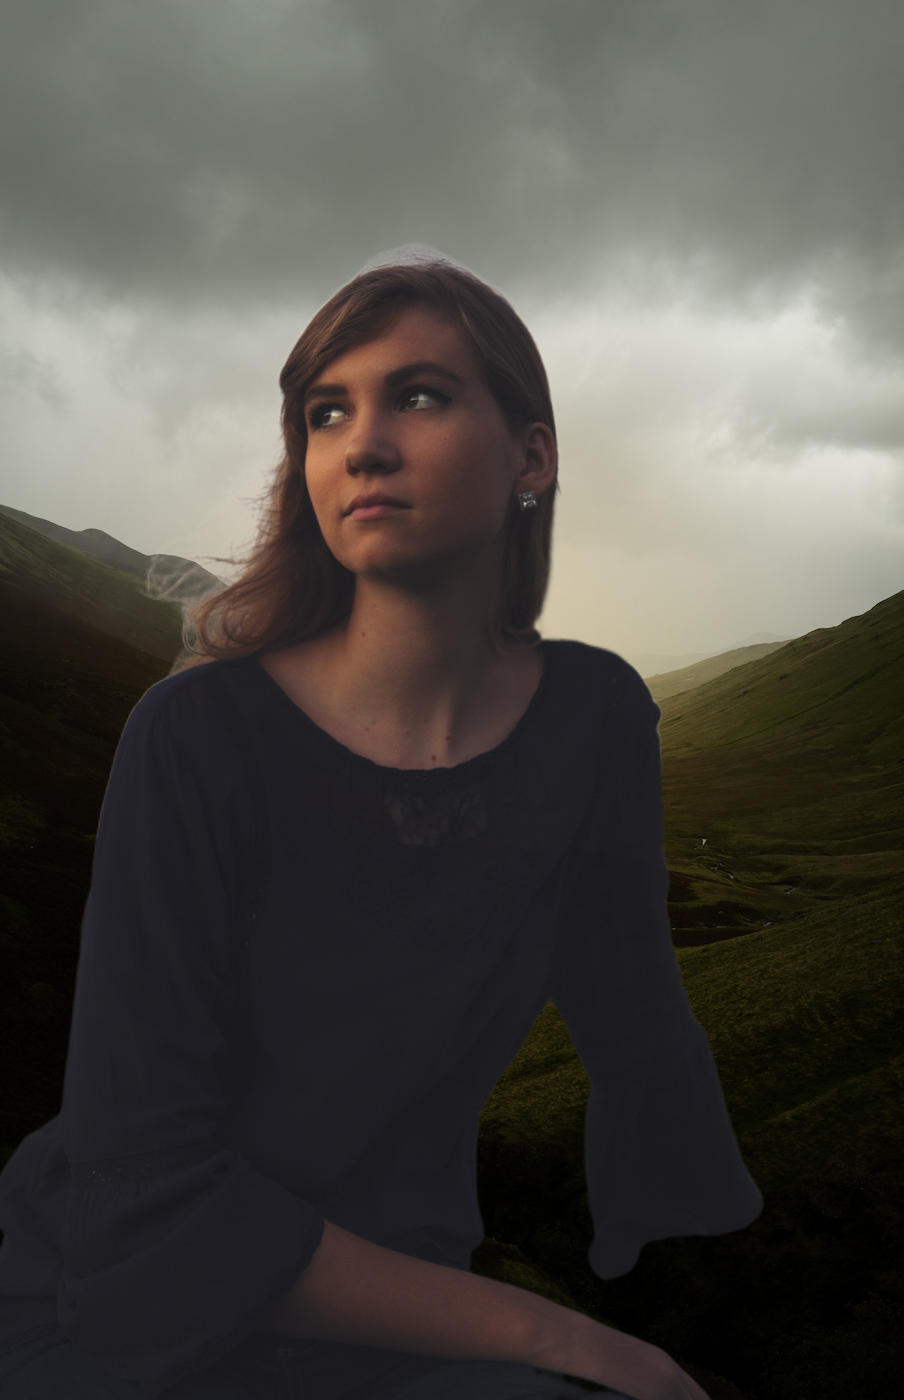